In [1]:
# Gregory Way - 2017
# pdx_exomeseq
# 6.visualize-oncoprint.ipynb
#
# Output:
# Oncoprint diagrams and similarity heatmaps for all replicates and consensus
#
# Data processing and specific plotting functions modified from vignette:
# https://bioconductor.org/packages/3.7/bioc/vignettes/ComplexHeatmap/inst/doc/s8.oncoprint.html

In [2]:
library(gplots)
library(RColorBrewer)
library(ComplexHeatmap)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: grid
ComplexHeatmap version 1.17.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.



In [3]:
# Input Files
replicate_oncoprint_file <- file.path("results", "oncoprint_replicates.tsv")
merged_oncoprint_file <- file.path("results", "oncoprint_merged.tsv")

replicate_sim_file <- file.path("results", "cosmic_similarity_replicates.tsv")
merged_sim_file <- file.path("results", "cosmic_similarity_merged.tsv")
prefiltered_sim_file <- file.path("results", "cosmic_prefiltered_similarity_merged.tsv")

In [4]:
# Output Files
replicate_oncoprint_out <- file.path("figures", "oncoprint_replicates.pdf")
merged_oncoprint_out <- file.path("figures", "oncoprint_merged.pdf")

replicate_sim_out <- file.path("figures", "cosmic_similarity_replicates.pdf")
merged_sim_out <- file.path("figures", "cosmic_similarity_merged.pdf")
prefiltered_sim_out <- file.path("figures", "cosmic_prefiltered_similarity_merged.pdf")

In [5]:
# Define Constants and Functions
col <- c("MUT" = "#008000", "AMP" = "red", "HOMDEL" = "blue")

In [6]:
process_oncoprint <- function(onco_file) {
  # Read in oncoprint file and process it in the form required for the
  # Oncoprint ComplexHeatmap function.
  #
  # Input:
  #     onco_file - file path pointing to oncoprint tab separated file
  #
  # Output:
  #     onco_matrix - file format ready for ComplexHeatmap

  onco_matrix <- read.table(onco_file, header = TRUE, stringsAsFactors = FALSE,
                            sep = "\t")
  onco_matrix[is.na(onco_matrix)] = ""
  rownames(onco_matrix) = onco_matrix[, 1]
  onco_matrix = onco_matrix[, -1]
  onco_matrix = onco_matrix[, -ncol(onco_matrix)]
  onco_matrix = t(as.matrix(onco_matrix))
  return(onco_matrix)
}

process_similarity <- function(sim_file) {
  # Read in gene by sample mutation matrix and get sample by sample correlation
  #
  # Input:
  #     sim_file - file path pointing to gene by sample mutations
  #
  # Output:
  #     correlation matrix for heatmap plotting

  cosmic_sim_df <- readr::read_tsv(sim_file)
  cosmic_dist_df <- data.matrix(dist(cosmic_sim_df, diag = TRUE, upper = TRUE))
  cosmic_dist_df <- data.matrix(cor(t(cosmic_sim_df[, 2:ncol(cosmic_sim_df)])))
  rownames(cosmic_dist_df) <- colnames(cosmic_dist_df) <- cosmic_sim_df$Case.ID
  return(cosmic_dist_df)
}

In [7]:
# This list of functions is taken in by the oncoPrint function and specifies
# how each of the observed alterations and the background are presented in
# terms of size and color
alter_fun = list(
  background = function(x, y, w, h) {
    grid.rect(x, y, w - unit(0.5, "mm"), h - unit(0.5, "mm"),
              gp = gpar(fill = "#CCCCCC", col = NA))
  },
  HOMDEL = function(x, y, w, h) {
    grid.rect(x, y, w - unit(0.5, "mm"), h - unit(0.5, "mm"),
              gp = gpar(fill = "blue", col = NA))
  },
  AMP = function(x, y, w, h) {
    grid.rect(x, y, w - unit(0.5, "mm"), h - unit(0.5, "mm"),
              gp = gpar(fill = "red", col = NA))
  },
  MUT = function(x, y, w, h) {
    grid.rect(x, y, w - unit(0.5, "mm"), h*0.33,
              gp = gpar(fill = "#008000", col = NA))
  }
)

## Profile Similarity

In [8]:
# Process similarity matrix data
sim_rep <- process_similarity(replicate_sim_file)
sim_con <- process_similarity(merged_sim_file)
sim_prefilter <- process_similarity(prefiltered_sim_file)

Parsed with column specification:
cols(
  .default = col_integer(),
  Case.ID = col_character()
)
See spec(...) for full column specifications.
Warning message in dist(cosmic_sim_df, diag = TRUE, upper = TRUE):
“NAs introduced by coercion”Parsed with column specification:
cols(
  .default = col_integer(),
  Case.ID = col_character()
)
See spec(...) for full column specifications.
Warning message in dist(cosmic_sim_df, diag = TRUE, upper = TRUE):
“NAs introduced by coercion”Parsed with column specification:
cols(
  .default = col_integer(),
  Case.ID = col_character()
)
See spec(...) for full column specifications.
Warning message in dist(cosmic_sim_df, diag = TRUE, upper = TRUE):
“NAs introduced by coercion”

In [9]:
# Output Similarity Matrix Visualizations
pdf(replicate_sim_out, height = 10, width = 10)
heatmap.2(sim_rep,
          labCol = FALSE,
          trace = "none",
          revC = TRUE,
          col = colorRampPalette(c("red", "black", "green"))(n = 200),
          main = "COSMIC Profile Similarity\nAll Replicates",
          cexRow = 0.4)
dev.off()

pdf 
  2

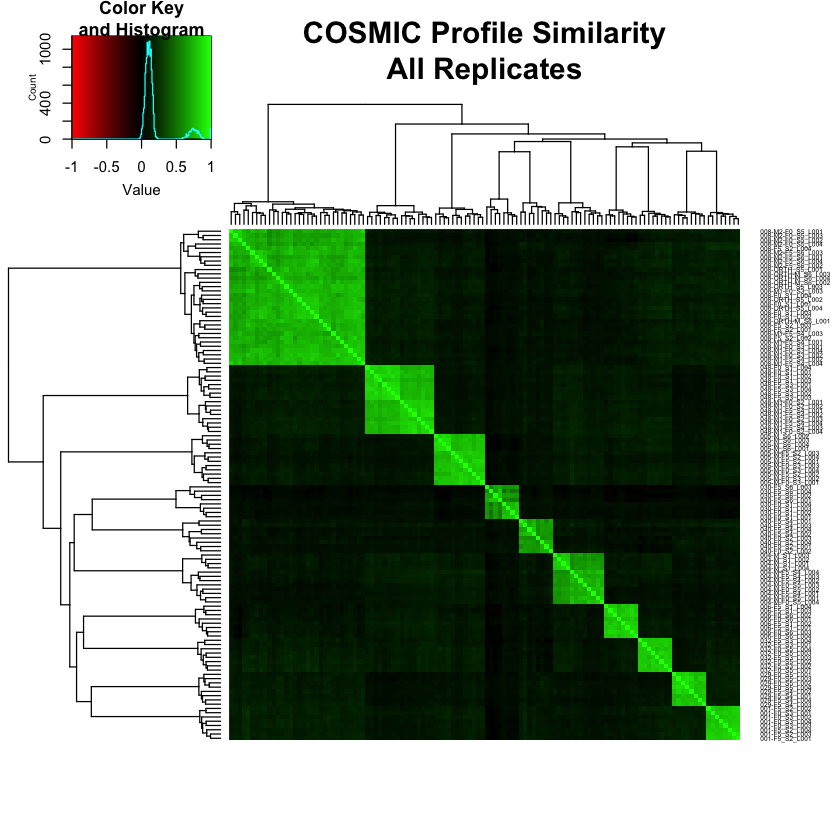

In [10]:
heatmap.2(sim_rep,
          labCol = FALSE,
          trace = "none",
          revC = TRUE,
          col = colorRampPalette(c("red", "black", "green"))(n = 200),
          main = "COSMIC Profile Similarity\nAll Replicates",
          cexRow = 0.4)

In [11]:
pdf(merged_sim_out, height = 8, width = 8)
heatmap.2(sim_con,
          labCol = FALSE,
          trace = "none",
          revC = TRUE,
          col = colorRampPalette(c("red", "black", "green"))(n = 200),
          main = "COSMIC Profile Similarity",
          cexRow = 0.75)
dev.off()

pdf 
  2

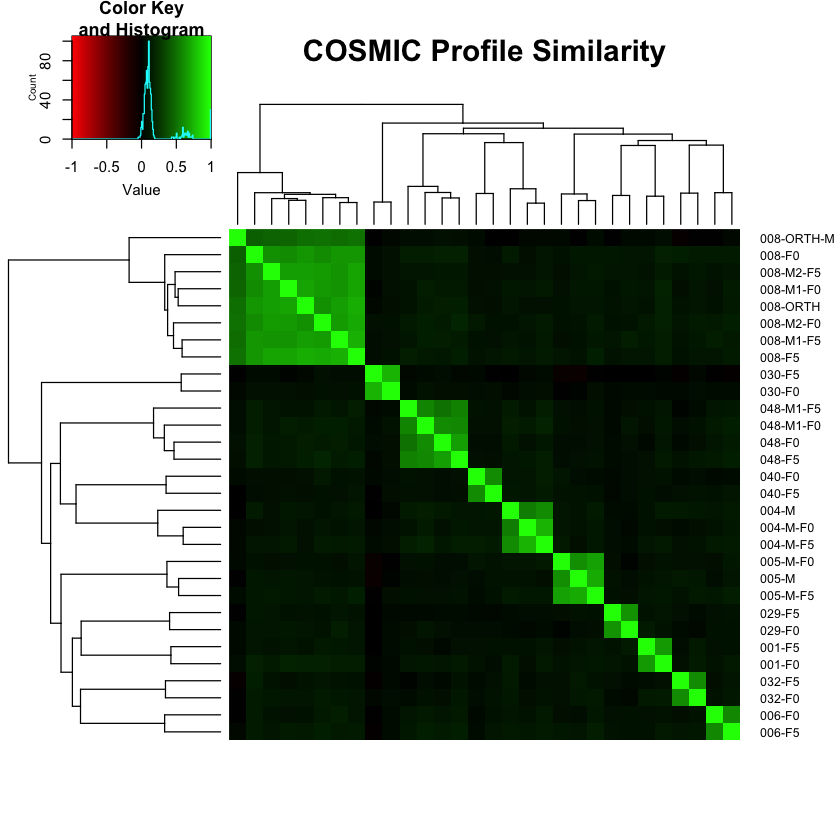

In [12]:
heatmap.2(sim_con,
          labCol = FALSE,
          trace = "none",
          revC = TRUE,
          col = colorRampPalette(c("red", "black", "green"))(n = 200),
          main = "COSMIC Profile Similarity",
          cexRow = 0.75)

In [13]:
# Output Similarity Matrix Visualizations
pdf(prefiltered_sim_out, height = 8, width = 8)
heatmap.2(sim_prefilter,
          labCol = FALSE,
          trace = "none",
          revC = TRUE,
          col = colorRampPalette(c("red", "black", "green"))(n = 200),
          main = "COSMIC Profile Similarity\nPrefiltered Variants",
          cexRow = 0.75)
dev.off()

pdf 
  2

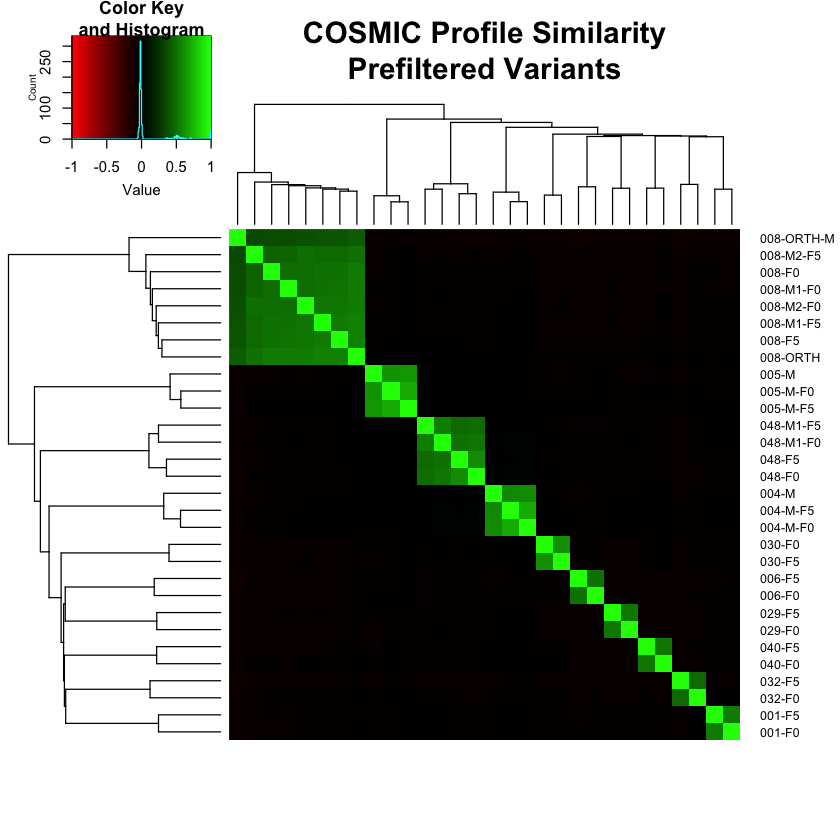

In [14]:
heatmap.2(sim_prefilter,
          labCol = FALSE,
          trace = "none",
          revC = TRUE,
          col = colorRampPalette(c("red", "black", "green"))(n = 200),
          main = "COSMIC Profile Similarity\nPrefiltered Variants",
          cexRow = 0.75)

## OncoPrint Diagrams

In [15]:
# Process input oncoprint matrices
mat_rep <- process_oncoprint(replicate_oncoprint_file)
mat_con <- process_oncoprint(merged_oncoprint_file)

pdf 
  2

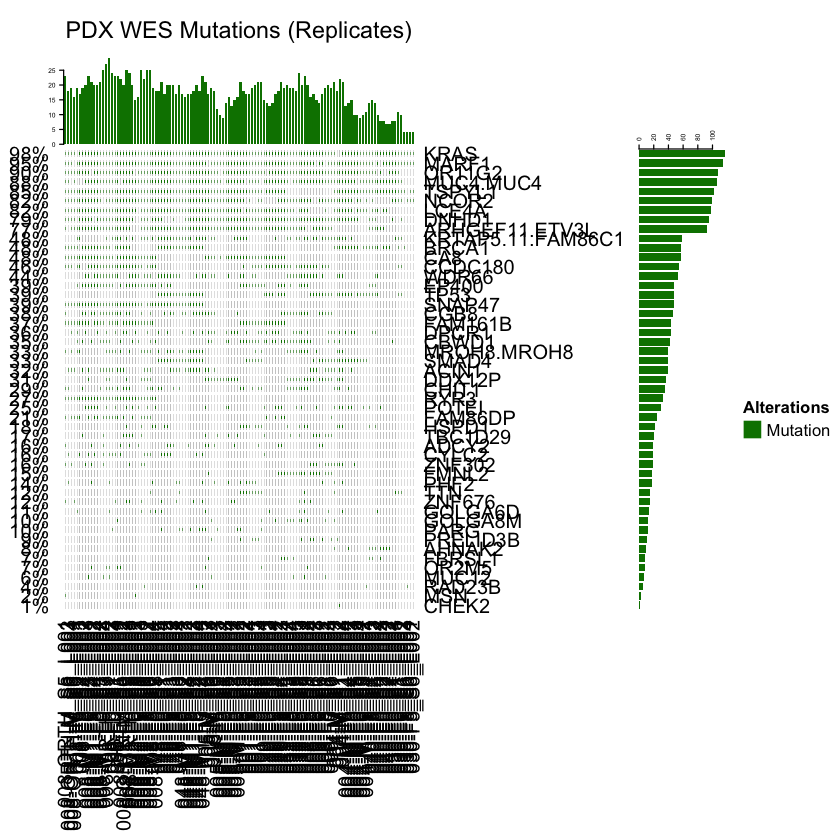

In [16]:
# Output OncoPrint Visualizations
p <- oncoPrint(mat_rep,
               get_type = function(x) strsplit(x, ";")[[1]],
               alter_fun = alter_fun,
               col = col,
               show_column_names = TRUE,
               column_title = "PDX WES Mutations (Replicates)",
               axis_gp = gpar(fontsize = 4),
               column_order = colnames(sim_rep)[hclust(dist(sim_rep))$order],
               heatmap_legend_param = list(title = "Alterations",
                                           at = c("AMP", "HOMDEL", "MUT"), 
                                           labels = c("Amplification",
                                                      "Deep deletion",
                                                      "Mutation")))

pdf(replicate_oncoprint_out, height = 10, width = 19)
p
dev.off()

p

pdf 
  2

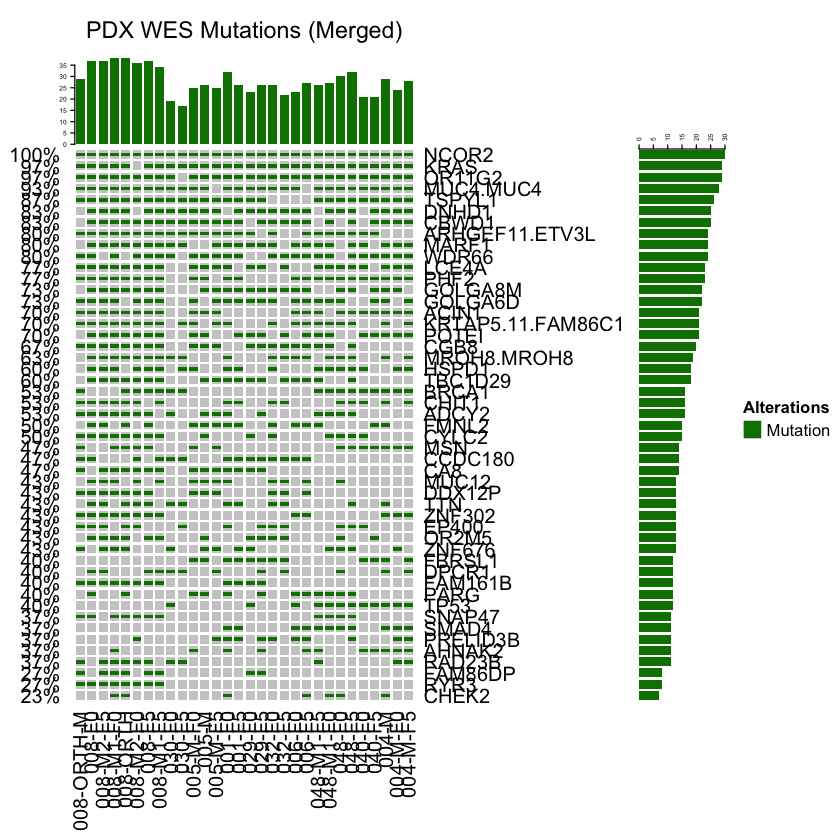

In [17]:
p <- oncoPrint(mat_con,
               get_type = function(x) strsplit(x, ";")[[1]],
               alter_fun = alter_fun,
               col = col,
               show_column_names = TRUE,
               column_title = "PDX WES Mutations (Merged)",
               axis_gp = gpar(fontsize = 4),
               column_order = colnames(sim_con)[hclust(dist(sim_con))$order],
               heatmap_legend_param = list(title = "Alterations",
                                           at = c("AMP", "HOMDEL", "MUT"), 
                                           labels = c("Amplification",
                                                      "Deep deletion",
                                                      "Mutation")))

pdf(merged_oncoprint_out, height = 10, width = 19)
p
dev.off()

p